In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt #show image
import matplotlib.image as mpimg # read image
import cv2

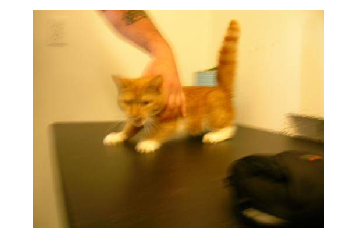

In [3]:
# 2 ways to show image:
# show image using matplotlib
imagename = 'D:/DATA/cats_vs_dogs/train/cat.0.jpg'
im = mpimg.imread(imagename)
plt.imshow(im)
plt.axis('off')#是否显示坐标
plt.show()

In [5]:
# show image using cv
imagename = 'D:/DATA/cats_vs_dogs/train/cat.0.jpg'
image = cv2.imread(imagename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Image Title",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#opencv face deaction
import numpy as np
import cv2

# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('C:/Users/Max/Anaconda3/pkgs/opencv3-3.1.0-py35_0/Library/etc/haarcascades/haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('C:/Users/Max/Anaconda3/pkgs/opencv3-3.1.0-py35_0/Library/etc/haarcascades/haarcascade_eye.xml')
cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        cv2.putText(img, 'Boy', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)#put text on video at (x,y)
    cv2.imshow('img',img)
    #save_path = 'D:/DATA/face/'
    #cv2.imwrite(save_path+str(i)+'.jpg',img)
    
    #k = cv2.waitKey(30) & 0xff
    #if k == 27:
        #break
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [2]:
#save video to disk from camera capturing
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
#save video file
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('D:/DATA/output.avi', fourcc, 20.0, (640,480))

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)#to gray scale
    out.write(frame)
    cv2.imshow('frame', frame)
    cv2.imshow('gray', gray)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

In [4]:
#save images to disk from camera capturing
import cv2
import numpy as np

cam = cv2.VideoCapture(0)
count = 0
timeF = 10  #视频帧计数间隔频率 

while(True):
    tf, frame = cam.read()
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #upper_red = np.array([130,255,255])
    #lower_red = np.array([110,100,100])
    #mask = cv2.inRange(frame, lower_red, upper_red)
    #frame = cv2.bitwise_and(frame,frame, mask=mask)
    if(count%timeF == 0): #每隔timeF帧进行存储操作
        cv2.imwrite("D:/DATA/1/frame{}.png".format(count), frame)
    count += 1
    cv2.imshow('Single Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam.release()
cv2.destroyAllWindows()

In [1]:
#camera capturing and face deaction and save vide files
import os  
import numpy  
from PIL import Image,ImageDraw  
import cv2  
  
  
cap = cv2.VideoCapture(0)  
fps = cap.get(cv2.CAP_PROP_FPS)  
size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))  
fourcc = cv2.VideoWriter_fourcc('I','4','2','0')  
video = cv2.VideoWriter("D:/aaa.avi", fourcc, 5, size)  
print(cap.isOpened()) 
  
classifier=cv2.CascadeClassifier("C:/Users/Max/Anaconda3/pkgs/opencv3-3.1.0-py35_0/Library/etc/haarcascades/haarcascade_frontalface_alt.xml")  
  
count=0  
while count > -1:  
    ret,img = cap.read()  
    faceRects = classifier.detectMultiScale(img, 1.2, 2, cv2.CASCADE_SCALE_IMAGE,(20,20))  
    if len(faceRects)>0:  
        for faceRect in faceRects:   
                x, y, w, h = faceRect  
                cv2.rectangle(img, (int(x), int(y)), (int(x)+int(w), int(y)+int(h)), (0,255,0),2,0)  
    video.write(img)  
    cv2.imshow('video',img)  
    key=cv2.waitKey(1)  
    if key==ord('q'):  
        break  
  
video.release()  
cap.release()  
cv2.destroyAllWindows()  

True


In [ ]:
#download images from web link and save resized images
import urllib.request
import cv2
import numpy as np
import os

def store_raw_images():
    #images link
    net_images_link = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n00523513'
    neg_image_urls = urllib.request.urlopen(net_images_link).read().decode()
    
    if not os.path.exists('neg'):
        os.makedirs('neg')
        
    pic_num = 1
    
    for i in neg_image_urls.split('\n'):
        try:
            print(i)
            urllib.request.urlretrieve(i, "neg/"+str(pic_num)+'.jpg')
            img = cv2.imread("neg/"+str(pic_num)+'.jpg', cv2.IMREAD_GRAYSCALE)
            resized_image = cv2.resize(img,(100,100))#resize 100*100
            cv2.imwrite("neg/"+str(pic_num)+'.jpg', resized_image)
            pic_num += 1
        except Exception as e:
            print(str(e))
    
store_raw_images()